<a href="https://colab.research.google.com/github/GenevaKirwan/CFG-Airline-Project/blob/Project-Working-Branch/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Environmental & Economical Impact of USA’s Airlines
## Data Analysis Project Final Code

The code within this document should be run and reviewed in conjuction with the accompanying report. The code below is split into three sections of analysis: Emissions, Fleet, Revenue and Ticket price. Together these sections will provide a comprehensive picture of the environmental and Economic Impact of 10 US Airlines.


## Emissions: 

### Emissions: Introduction to Section

This section of code looks at creating a csv file with all of our our chosen airlines from data on the website: https://www.transtats.bts.gov/fuel.asp?pn=0&display=data1 to obtain a breakdown of their fuel consumption over a ten year period (2010 - 2019). Since we are only concerned with the total fuel consumption, the data will need to be cleaned to remove any unwanted columns, as well as removing data rows for years outside of the scope of our analysis.

To perform the conversion from fuel consumption to carbon emissions, we will need a conversion factor. The most commonly used fuel in commercial aviation is Jet A fuel so we can safely assume that our airlines will be using this for their passenger aircrafts. This type of fuel has a carbon emissions factor of 3.15 kg CO2/kg of fuel, so by multiplying the conversion factor by the fuel used by each airline, their carbon emissions can be computed.

As the fuel consumption data is given in gallons, a conversion factor of 3.02 will be needed to convert the the fuel quantities to kg first before calculating the carbon dioxide emissions in kg.

### Emissions: Initial Data Source

The data for this particular section is available only as a table on the BTS website. Unfortunately, due to the age of the website, there were no API's available and it was not possible to webscrape the site, thus a very error prone copy and paste method was used to obtain the data.

The webpage: https://www.transtats.bts.gov/fuel.asp?pn=0&display=data1 has two dropdown menus, the first allows you to select a carrier, the second to select a service. For each of the 10 carriers in order, you must select the carrier name from the first dropdown menu, then select Scheduled Serveice from the second menu, the press the submit button. After a few seconds, the screen will flash and the new table will be displayed.

It is extremely important that the airlines are selected in the following order, otherwise the data will be incorrectly labeled at the cleaning and transformation stage: 

- 'Alaska Airlines Inc.'
- 'American Airlines Inc.'
- 'Delta Air Lines Inc.' 
- 'Frontier Airlines Inc.'
- 'Hawaiian Airlines Inc.'
- 'JetBlue Airways'
- 'SkyWest Airlines Inc.'
- 'Southwest Airlines Co.'
- 'Spirit Air Lines'
- 'United Air Lines Inc.'

After selecting an airline, starting from the first row containing 2010, copy the entire table up to the last row that contains %Chg over 2018 which follows after the 2019 Total row. Paste this into a blank excel spreadsheet. The data should take up 140 rows. Copy and paste the same table sections one after the other for the other 9 airlines in the order above, such that the spreadsheet is 1400 lines long and save the speadsheet as a csv called 'Fuel-Table'.

Now we are ready to clean the data.

### Emissions: Cleaning the Fuel Consumption Data

The summary sections from the webpage have to be removed as they disrupt the order of the data, and redundant data must also be removed.

In [ ]:
# Once the data has been successfully saved, it can be read in as a pandas dataframe as follows:

import pandas as pd

# Where there are columns that we will be getting rid of, they are read in as A, B, C... rather than their actual (very long) names 
fuel_table = pd.read_csv("Fuel-Table.csv", names = ["Year", "Month", "A", "B", "C", "D", "E", "F", 
                                                    "Total Fuel Consumed (thousands of gallons)",
                                                    "Total Cost of Fuel (dollars)",
                                                   "Cost per Gallon (dollars)"])

fuel_table.head()

In [ ]:
# Using the webpage for guidance, we can drop the domestic and international fuel breakdown columns by their column index
# They are the middle 6 columns so can be deleted from the same position with a for loop that runs 6 times.

for i in range(6):
    fuel_table.drop(fuel_table.columns[2], axis=1, inplace=True)
fuel_table.head()

In [ ]:
# To drop the summary statistics found twice in every 14 rows, the following lines of code are run. After the first line
# runs to remove the % Change rows, the space between the Total rows reduces, hence why the slice step reduces to 13.

fuel_table.drop(fuel_table.index[13:1400:14],inplace = True)
fuel_table.drop(fuel_table.index[12:1400:13],inplace = True)

# Check that the rows are gone
fuel_table.head(30)

### Emissions: Transforming Data
In order to use this dataset with any of the other datasets, new columns must be added for things such as the unique airline identifier (IATA code), the airline name and other useful values such as the month in numerical form. We must also calculate the CO2 emissions from the total fuel consumed. 

First we must add in a column for the IATA code which identifies each airline, this should be easy to do, as we 
copied the data over in a specific order and we know the IATA codes for each airline as they are given next to the airline name on the dropdown menu on the webpage. 

In [ ]:
# Check the length of the fuel table
fuel_table.shape

In [ ]:
# There's clearly 10 years of 12 months for each eariline, so we add the IATA code for each airline to a list called codes
# 120 times.
codes = []
codes += ['AS' for i in range(120)]
codes += ['AA' for i in range(120)]
codes += ['DL' for i in range(120)]
codes += ['F9' for i in range(120)]
codes += ['HA' for i in range(120)]
codes += ['B6' for i in range(120)]
codes += ['OO' for i in range(120)]
codes += ['WN' for i in range(120)]
codes += ['NK' for i in range(120)]
codes += ['UA' for i in range(120)]

In [ ]:
# Add the codes column at the start of the dataframe:
fuel_table.insert(0, 'IATA Code', codes)

Next we want to add in a column next to the one we just created for the Airline Name associated with each code, since it is not immediately obvious from the codes which airline is which. We can generate a list of names in the same way as before with the codes:

In [ ]:
names = []
names += ['Alaska Airlines' for i in range(120)]
names += ['American Airlines' for i in range(120)]
names += ['Delta Air Lines' for i in range(120)]
names += ['Frontier Airlines' for i in range(120)]
names += ['Hawaiian Airlines' for i in range(120)]
names += ['JetBlue Airways' for i in range(120)]
names += ['SkyWest Airlines' for i in range(120)]
names += ['Southwest Airlines' for i in range(120)]
names += ['Spirit Air Lines' for i in range(120)]
names += ['United Air Lines' for i in range(120)]

In [ ]:
# Add the airline names as the second column (i.e. at position 1)
fuel_table.insert(1, 'Airline Name', names)
fuel_table

We will now add in a numerical column that represents the month, at column index 4, so that it comes after the written 
month

In [ ]:
# The months cycle round uniformly so a loop is appropriate to generate these column values:
month_nums = []
for i in range(100):
    month_nums.extend([1,2,3,4,5,6,7,8,9,10,11,12])
    
fuel_table.insert(4, 'Month Number', month_nums)
fuel_table

Some of the datasets are given as quartely results so a quarter column should be added after the month column.

In [ ]:
# Create another for loop to generate the quarters:
quarter_nums = []
for i in range(100):
    quarter_nums.extend([1,1,1,2,2,2,3,3,3,4,4,4])
    
fuel_table.insert(5, 'Quarter', quarter_nums)
fuel_table

As stated in the introduction, the fuel is given in gallons, however CO2 emissions from fuel combustion are typically calculated in kg of CO2 per kg of fuel so we must convert the fuel from gallons to kg using the conversion factor of 3.02 used for Jet A fuel. 

In [ ]:
# First reset the index after having removed the summary rows at the start, then remove the extra index column generated
fuel_table = fuel_table.reset_index()
fuel_table.drop(fuel_table.columns[0], axis = 1, inplace=True)

# Since the fuel consumed is not a numerical data column due to the comma formatted numbers used on the webpage, we must remove
# the commas then convert the data to floats before multiplying by the conversion factor.

fuel_kg = []
for i in range(len(fuel_table)):
    result = float(str(fuel_table['Total Fuel Consumed (thousands of gallons)'][i]).replace(",",""))*3.02
    fuel_kg.append(result)
    
fuel_table['Total Fuel Consumed (thousands of kg)'] = fuel_kg
fuel_table

Finally we can calculate the kg of CO2 emissions per kg of fuel using the conversion factor of 3.15 mentioned in the introduction.

In [ ]:
co2_kg = []
for i in range(len(fuel_table)):
    result = (fuel_table['Total Fuel Consumed (thousands of kg)'][i])*3.15
    co2_kg.append(result)
    
fuel_table['CO2 Emissions (thousands of kg)'] = co2_kg
fuel_table

Now we can save all of our changes to a new csv file that reflects the data transformations. This file is available to download from our GitHub repository.

In [ ]:
fuel_table.to_csv("Fuel-Data&Emissions-Table.csv", sep = ',')

### Emissions: Analysis

Here we will explore the data and decide what plots will be useful to produce in order to better understand the data.

In [ ]:
# Once the data has been successfully saved, it can be read in as a pandas dataframe as follows:

import pandas as pd

fuel_table = pd.read_csv("Fuel-Data&Emissions-Table.csv")

In [ ]:
fuel_table.shape

In [ ]:
fuel_table.info()

In [ ]:
print(fuel_table)

Having got an idea of the data structure we are working with, it seems like it would be a good idea to get a sense of how the emissions of each airline have changed over the 10 year period. It would also be helpful to get a ranked result for the most recent year (2019), as the combination of a ten year trend and a more detailed recent breakdown, can help inform future predictions for which airlines will be the most environmentally problematic.

### Emissions: Data Visualisation and Analysis
Data visualisation for the yearly cleaned emissions data will be will be covered in later sections of the code where the emissions are considered in conjunction with other factors. 

Isolating just the 2019 results:

In [ ]:
year_grouped = fuel_table[fuel_table['Year'] == 2019]

# print(year_grouped)

In [ ]:
# Group by the airlines, for this I've used their Airline Name but you could use the IATA Code and get the same result
# We then get the total CO2 emissions.

airline_grouped = year_grouped.groupby('Airline Name')['CO2 Emissions (thousands of kg)'].sum()
# print(airline_grouped)

# Sort series into descending order
airline_sorted = airline_grouped.sort_values(ascending = False).to_frame().reset_index()
print(airline_sorted)

# Note the result will be in thousands of kg x 10 to a large power which is displayed as e+0n where n is the power.

In [ ]:
# Plotting the aggregated data as a scatter plot:

import matplotlib.pyplot as plt

x = airline_sorted['Airline Name'].unique().tolist()
y = airline_sorted['CO2 Emissions (thousands of kg)'].tolist()

plt.figure(figsize=(12,9))

plt.scatter(x, y, label = 'CO2 Emissions (thousands of kg)')


plt.xticks(rotation=90)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('2019 CO2 Emissions From Fuel Combustion For Each Airline', size = 15)
plt.xlabel('Airline Name', size = 12)
plt.ylabel('Total CO2 Emissions (thousands of kg)', size = 12)


plt.show()

The plot above shows that in the year 2019, the total emissions for the 10 largest USA airlines was separated into three clear sections. The first section contains American, Delta and United Airlines which all had the highest emissions. The second group contains Jetblue, Alaska, Spirit, Frontier, Hawaiian and SkyWest Airlines, which all have lower emissions during this year. Southwest Airlines forms a third group on its own, falling in between the higher and lower CO2 emissions sections. The aforementioned high-emission airlines had approximately thrice the amount of CO2 emissions compared to Jetblue Airlines, which lies in the lower emission group. This is a significant jump in emissions between the low and high emitting airlines, thus we have chosen to explore some of the factors such as fleet size and numbers of passengers carried alongside the emissions data in order to begin to explain this great increase.  

We decided that it would be interesting to explore whether there is a correlation between the carbon emissions of each airline and their per-passenger carbon footprint. The remainder of this emissions section will focus on the handling of passenger data to obtain this carbon footprint measure.

### Emissions and Passengers: Analysis of the Passenger Data for Each of the 10 Airlines and Calculating the Carbon Footprint per Passenger for Each Airline

To calculate the carbon footprint per passenger, we first need to get the number of passengers flying with each airline.

The data for the number of passengers on each flight can be found at https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=GDM&QO_fu146_anzr=Nv4%20Pn44vr45. The Air Carriers : T-100 Segment (US Carriers Only) data found here is the result of the Form 41 Traffic survey given to airlines for them to report their key carrier statistics.

Instructions are given in the next section on how to obtain the exact data needed for this study using the website listed above.

### Emissions and Passengers: Initial Data Source

The website has a range of options, so to obtain data for the ten year period (2010-2019), select each year in turn from the dropdown menu, select the following options and download the csv from the website: 


- Passengers - Non-Stop Segment Passengers Transported
- UniqueCarrier - Unique Carrier Code.
- UniqueCarrierName - Unique Carrier Name.
- OriginAirportID - Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
- OriginCityName - Origin Airport, City Name
- DestAirportID
- DestCityName
- AircraftType
- Year
- Quarter
- Month

Having saved the 10 csv files individually, giving each of them the year of reporting as the title, e.g. '2010.csv', they will need to be combined into one single file. 

### Emissions and Passengers: Data Cleansing and Transforming 

Ideally we would want to combine the 10 files straight away, however together they contain millions of lines of data so first we need to clean each year's file individually, removing the airlines we aren't studying in this project and any flights which had no passengers. This will cut down the file size by about 2/3 and remove any redundant data.

In [ ]:
import pandas as pd
import os

# This is an example path to get to the csv's, you will need to specify your own path depending on where the files are saved

path = '/Users/genev/Documents/CFG/Airline_Project'
os.chdir(path)

In [ ]:
# First, define a function to get all the unique airline IATA codes, with the 10 airlines we're studying removed

def get_unwanted_codes(file):
    
    unwanted_codes = file['UNIQUE_CARRIER'].unique().tolist()
    # Uncomment the line below to check the total number of IATA codes
    # print(unwanted_codes)
    
    # These codes are the unique carrier codes for the 10 airlines we are interested in studying
    wanted_codes = ['AA', 'AS', 'DL', 'F9', 'HA', 'B6', 'WN', 'NK', 'UA', 'OO']

    for code in wanted_codes:
        if code in unwanted_codes:
            unwanted_codes.remove(code)
            
    return unwanted_codes

In [ ]:
# Define a function for cleaning the dataset by removing unwanted airlines and flights that had no passengers on.
    
def drop_unwanted_airlines(file, name):
    
    # Call the unwanted codes function to get the codes for the individual file
    codes = get_unwanted_codes(file)
    
    # Change the index to the IATA carrier code, drop the rows with the unwanted codes and reset the index 
    file = file.set_index('UNIQUE_CARRIER').drop(codes).reset_index()
    
    # Remove the rows with 0 passengers
    file = file.set_index('PASSENGERS').drop(0).reset_index()
    
    # Check that the correct rows have been removed by uncommenting the line below
    # file.head(50)
    
    file.to_csv('new{}'.format(name), sep = ',')

Generate a list of the csv files previously saved under the year that the data was recorded ('2010.csv', '2011.csv'...'2019.csv')

In [ ]:
names = []
for i in range(10, 20):
    name = 2000 + i
    name = str(name)
    name += '.csv'
    names.append(name)

Cycle through the files, calling the function that will clean the csv file and create a new file.

In [ ]:
for name in names:
    filename = pd.read_csv(name, sep = ',')
    drop_unwanted_airlines(filename, name)

The 10 new files can now be combined into one master file containing passenger statistics for all flights by the ten airlines for the ten year period (2010 - 2019).

In [ ]:
# Using the filenames, combine the individual years into one single csv

import pandas as pd
import os, glob

# This is an example path to get to the csv's, you will need to specify your own path depending on where the files are saved
path = '/Users/genev/Documents/CFG/Airline_Project'

files = glob.glob(os.path.join(path, "new*.csv"))

all_passengers = pd.concat([pd.read_csv(file, sep =',') for file in files])

# The line below was used to check that the final file has the correct columns. When run, it is clear that the final file 
# has an extra column called 'Unnamed: 0' so I have added a line to remove the first column before saving the file to a csv.

# print(all_passengers.columns.values)

all_passengers = all_passengers.drop('Unnamed: 0', axis = 1)

# Save the new csv
all_passengers.to_csv('all_passengers.csv', sep = ',')

# Read in the csv and check that the files have been combined in the correct order

pass_df = pd.read_csv('all_passengers.csv',sep=',' )
pass_df.tail(20)

### Emissions and Passengers: Data Visualisation and Analysis

In order to see what the relationship between passengers numbers and the volume of CO2 emissions are for each airline, the two csv's created in this section of the code had to be merged.

Combining the emissions and passenger data to obtain a yearly per-passenger carbon footprint.

In [ ]:
import pandas as pd

# Read in the 2 csv's

fuel_df = pd.read_csv('Fuel-Data&Emissions-Table.csv')
pass_df = pd.read_csv('all_passengers.csv', sep=',' )

To compare yearly total emissions with yearly total passengers, first both data sets have to be aggregated.

In [ ]:
# Groupby year and airline code 

yearly_passenger_sum = pass_df.groupby(['YEAR','UNIQUE_CARRIER'])['PASSENGERS'].sum()
yearly_pass_df = yearly_passenger_sum.to_frame().reset_index()

yearly_emissions_sum = fuel_df.groupby(['Year','IATA Code'])['CO2 Emissions (thousands of kg)'].sum()
yearly_emm_df = yearly_emissions_sum.to_frame().reset_index()

In [ ]:
# At this point we can plot just the passenger sum to see how the number of passengers being transported change over time
x = yearly_pass_df['YEAR'].unique().tolist()
y = yearly_pass_df['PASSENGERS'].tolist()
labels = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 
          'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines',
          'United Air Lines Inc.']

plt.figure(figsize=(13,10))

plt.plot(x, y[0:99:10], label = labels[0])
plt.plot(x, y[1:99:10], label = labels[1])
plt.plot(x, y[2:99:10], label = labels[2])
plt.plot(x, y[3:99:10], label = labels[3])
plt.plot(x, y[4:99:10], label = labels[4])
plt.plot(x, y[5:99:10], label = labels[5])
plt.plot(x, y[6:99:10], label = labels[6])
plt.plot(x, y[7:99:10], label = labels[7])
plt.plot(x, y[8:99:10], label = labels[8])
plt.plot(x, y[9:100:10], label = labels[9])

plt.legend(loc='center right', bbox_to_anchor=(1.3,0.5))
plt.xticks(x)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('Yearly Total Passengers For Each Airline (2010 - 2019)', size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('Total Passengers Transported', size = 12)

plt.show()

In [ ]:
# Rename the shared columns of the emissions and passenger data frames so that the two datasets can be merged 

yearly_pass_df = yearly_pass_df.rename(columns={"UNIQUE_CARRIER": "IATA Code", "YEAR":"Year"})

In [ ]:
# Check that the two datasets have shared column headers 

yearly_emm_df.head()
yearly_pass_df.head()

Merge the dataframes:

In [ ]:
merged = yearly_emm_df.merge(yearly_pass_df)
merged.head(30)

Calculate the carbon emissions per passenger and add to the merged dataframe:

In [ ]:
carbon_footprint = []
for i in range(len(merged)):
    result = ((merged['CO2 Emissions (thousands of kg)'][i])/(merged['PASSENGERS'][i]))*1000  # Convert thousands of kg to kg
    carbon_footprint.append(result)
    
# print(len(carbon_footprint))
    
merged['Carbon Footprint (kg)'] = carbon_footprint

merged.head()

Graph the carbon footprint per person

In [ ]:
import matplotlib.pyplot as plt

x = merged['Year'].unique().tolist()
y = merged['Carbon Footprint (kg)'].tolist()
labels = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 
          'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines',
          'United Air Lines Inc.']

plt.figure(figsize=(13,10))

plt.plot(x, y[0:100:10], label = labels[0])
plt.plot(x, y[1:100:10], label = labels[1])
plt.plot(x, y[2:100:10], label = labels[2])
plt.plot(x, y[3:100:10], label = labels[3])
plt.plot(x, y[4:100:10], label = labels[4])
plt.plot(x, y[5:100:10], label = labels[5])
plt.plot(x, y[6:100:10], label = labels[6])
plt.plot(x, y[7:100:10], label = labels[7])
plt.plot(x, y[8:100:10], label = labels[8])
plt.plot(x, y[9:100:10], label = labels[9])

plt.legend(loc='center right', bbox_to_anchor=(1.3,0.5))
plt.xticks(x)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('Yearly Carbon Footprint Per Person (kg) For Each Airline (2010 - 2019)', size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('C02 Emissions Per Passenger (kg)', size = 12)


plt.show()

For many airlines it seems that in more recent years, their carbon emissions per passenger have decreased, despite the fact that the the number of passengers transported increases each year. We can speculate that this might be due to the acquisition of newer, more energy efficient planes, however as is demonstrated in later sections of this code, fleet age is just one factor that might be contributing to lowering emissions. It is interesting to note that the three airlines which are responsible for producing the most CO2 emissions by far, actually have a mid-range carbon footprint per passenger, compared with airlines such as Spirit who although produce a lower proportion of the total CO2 emissions overall, they actually have the highest carbon footprint per passenger by far. This means that they must not be transporting nearly as many passengers as the other lower total emissions airlines, despite using the same amount of fuel.

## Fleet: Analysis of the Fleet Portfolio as it Relates to Emissions

### Fleet: Introduction to Section

Within this section fleet data has been analysed for the airlines within the scope of this project. The data has been reformatted, cleansed and visualised in parallel with the emissions data to see what impact fleet characteristics (size, capacity, age and model) has on total annual emissions and to identify which tenents make up a low-emission airline.

Within this section, the pandas and matplotlib libraries have been used to allow for dataframe generation and manipulation as well as visualisation in the form of scatterplots, nested pie charts and histograms.

### Fleet: Initial Data Source

Inventory Data for each of the 10 selected airlines has been downloaded from the Bureau of Transportation Statistics website as a csv file. This data included information about each aircraft owned by American based airlines.

When importing the data into a pandas dataframe, only the columns related to the analysis have been retained, this minimises the space complexity of the code.

In [ ]:
import pandas as pd
req_col = ['CARRIER', 'CARRIER_NAME', 'OPERATING_STATUS', 'MANUFACTURER','MODEL', 'CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR']
BTS_fleet_pd = pd.read_csv('1053933928_T_F41SCHEDULE_B43.csv', usecols= req_col)
BTS_fleet_pd      

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS
0,0WQ,Avjet Corporation,2002,Y,Boeing,BBJ7377EG,171000
1,0WQ,Avjet Corporation,2006,Y,Bombardier,GlobalExpress,96000
2,0WQ,Avjet Corporation,2007,Y,Bombardier,GlobalExpress,99500
3,0WQ,Avjet Corporation,2014,Y,Dassault-Falcon-2000EXEASy,DASSAULT-FALCON-2000,90700
4,0WQ,Avjet Corporation,2000,Y,Gulfstream,GA-IV-IV,74600
...,...,...,...,...,...,...,...
7690,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972
7691,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972
7692,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972
7693,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972


### Fleet: Data Cleansing and Transforming

With the overwhelming amount of data provided for each individual aircraft it is difficult to analyse the fleet fingerprint. To make this data more manageable and enhance the data quality, data cleansing was carried out. Removal of redundant data and duplication as well as standardisation for the manufacturers columns has been carried out.

#### Removing Redundant data

The rows which contained non-operating planes or airlines beyond the scope of this project have been removed, resulting in a significantly smaller dataframe.

In [ ]:
airlines_list ='Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'Frontier Airlines Inc.','Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines', 'United Air Lines Inc.'
BTS_fleet_pd = BTS_fleet_pd[(BTS_fleet_pd.CARRIER_NAME.isin(airlines_list)) & (BTS_fleet_pd.OPERATING_STATUS == 'Y')]
BTS_fleet_pd

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS
750,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
751,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
752,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
753,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
754,AA,American Airlines Inc.,2014,Y,Boeing,B737-823,40800
...,...,...,...,...,...,...,...
7224,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421
7225,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421
7226,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421
7227,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421


#### Standardising Manufacturer Names

To check the current extent of standardisation, the manufacturers currently included in the dataset will be viewed. As can be seen below many of the manufacturers have been listed with varying names, this will make it difficult when visualising the data later.

In [ ]:
man_ls = []

for model in BTS_fleet_pd['MANUFACTURER']:
    if model not in man_ls:
        man_ls.append(model)
print(man_ls)

['Airbus', 'Boeing', 'TheBoeingCompany', 'AirbusCompany', 'Embraer', 'AirbusIndustrie', 'BOEINGCOMPANY', 'AirbusIndustries', 'Bombardier', 'BoeingCo', 'THEBOEINGCO']


The manufacturer names have been standardised below and the resulting dataframe has been reindexed

In [ ]:
import pandas as pd

BTS_fleet_pd.replace(to_replace =["Airbus", "AirbusCompany", "AirbusIndustrie", "AirbusIndustries"], 
                            value ="AIRBUS", inplace = True)
BTS_fleet_pd.replace(to_replace =["Boeing", "TheBoeingCompany", "BOEINGCOMPANY", "THEBOEINGCO", "BoeingCo"], 
                            value ="BOEING", inplace = True)
BTS_fleet_pd.replace(to_replace =["Embraer"], 
                            value ="EMBRAER", inplace = True)
BTS_fleet_pd.replace(to_replace =["Bombardier"], 
                            value ="BOMBARDIER", inplace = True)
BTS_fleet_pd.reset_index(drop = True)

D:\Jupyter\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS
0,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
1,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
2,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
3,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
4,AA,American Airlines Inc.,2014,Y,BOEING,B737-823,40800
...,...,...,...,...,...,...,...
4465,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421
4466,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421
4467,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421
4468,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421


This data frame is then saved as a csv. This version of the data will be useful for visualising the capacity and manufacturer year distributions later

In [ ]:
from datetime import date
today = date.today()
file_name = 'BTS_fleet' + today.strftime("%d%m%y") + '.csv'
BTS_fleet_pd.to_csv(file_name)

#### Removing Duplicates

Whilst the full dataset will be useful when analysing capacity and nanufacturer year, when analysisng the fleet model distribution these variabled complicate the data set. Resultantly, duplicate model listings have been summed to make visualisation easier later. Currently within the dataset every individual aircraft is listed.

In [ ]:
BTS_fleetsize_pd = BTS_fleet_pd.groupby(BTS_fleet_pd.columns.tolist(),as_index=False).size()
BTS_fleetsize_pd.rename(columns={"size": "NO. AIRCRAFTS"}, inplace = True)
BTS_fleetsize_pd

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS,NO. AIRCRAFTS
0,AA,American Airlines Inc.,1997,Y,AIRBUS,A320-232,38500,1
1,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-112,35000,6
2,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-132,36700,3
3,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-214,37200,1
4,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-232,38500,3
...,...,...,...,...,...,...,...,...
551,WN,Southwest Airlines Co.,2017,Y,BOEING,B-737-8H4,43800,39
552,WN,Southwest Airlines Co.,2018,Y,BOEING,B-737-8,48421,17
553,WN,Southwest Airlines Co.,2018,Y,BOEING,B-737-8H4,43800,26
554,WN,Southwest Airlines Co.,2019,Y,BOEING,B-737-8,48421,3


To check that we now have no duplicate entries the data set for just one of the airlines will be reviewed: American Airlines

In [ ]:
just_american = BTS_fleetsize_pd[BTS_fleetsize_pd.CARRIER == 'AA']
just_american

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS,NO. AIRCRAFTS
0,AA,American Airlines Inc.,1997,Y,AIRBUS,A320-232,38500,1
1,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-112,35000,6
2,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-132,36700,3
3,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-214,37200,1
4,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-232,38500,3
...,...,...,...,...,...,...,...,...
87,AA,American Airlines Inc.,2019,Y,BOEING,B737-800MAX,42900,6
88,AA,American Airlines Inc.,2019,Y,BOEING,B787-9,84600,2
89,AA,American Airlines Inc.,2020,Y,AIRBUS,A321-253NX,52200,16
90,AA,American Airlines Inc.,2020,Y,BOEING,B737-800MAX,42900,8


Based on reviewing the data for American Airlines, it is evident that some of the plane models can have different capacities. To simplify this data we need to focus on the model and sum up the number of aircrafts per model.

In [ ]:
BTS_model_pd = BTS_fleetsize_pd.groupby(['CARRIER','CARRIER_NAME','MANUFACTURER','MODEL'], as_index = False)[["NO. AIRCRAFTS"]].sum()
BTS_model_pd

,CARRIER,CARRIER_NAME,MANUFACTURER,MODEL,NO. AIRCRAFTS
0,AA,American Airlines Inc.,AIRBUS,A319-112,62
1,AA,American Airlines Inc.,AIRBUS,A319-115,32
2,AA,American Airlines Inc.,AIRBUS,A319-132,39
3,AA,American Airlines Inc.,AIRBUS,A320-214,22
4,AA,American Airlines Inc.,AIRBUS,A320-232,26
...,...,...,...,...,...
105,WN,Southwest Airlines Co.,BOEING,B-737-7K9,4
106,WN,Southwest Airlines Co.,BOEING,B-737-7L9,5
107,WN,Southwest Airlines Co.,BOEING,B-737-7Q8,19
108,WN,Southwest Airlines Co.,BOEING,B-737-8,41


This refined data set has been saved.

In [ ]:
from datetime import date
today = date.today()
file_name = 'BTS_models' + today.strftime("%d%m%y") + '.csv'
BTS_fleetsize_pd.to_csv(file_name)

### Fleet: Data Visualisation

#### Fleet Models Pie Chart

A key aspect of the analysis to be carried out is an appreciation of the type of aircraft each airline has. It is possible there may be a correlation between the make of aircraft and the total emmissions. The method for visualising this aspect of the data set will be pie charts as the model data is categorical.

A function for creating nested pie charts has been written below. Within the pie chart the outer ring shows the aircraft manufacturer with the inner ring showing individual aircraft models. As there are many different models this approach was considered useful to make a diagram which was more human readable. Much of the complexity of the function is due to the color mapping process.

A qualitative color map (Tab20c) was used to colour each wedge in the pie chart. However, as this colour map only contained 4 distinct hues for each colour further work was required to repeat hues the appropriate number of times within the graph. Additionally consideration was required when assigning a matching coulour for the outer wedge in the pie chart. The result of the care taken in the colour picking process is that it is easy to see which models relate to which manufacturer. The parts of the code associated with the color mapping process start with the comment 'Color Picking'.

The nested pie chart was then created using wedgeprops to set both the inner and outer rings.

<function matplotlib.pyplot.show(close=None, block=None)>

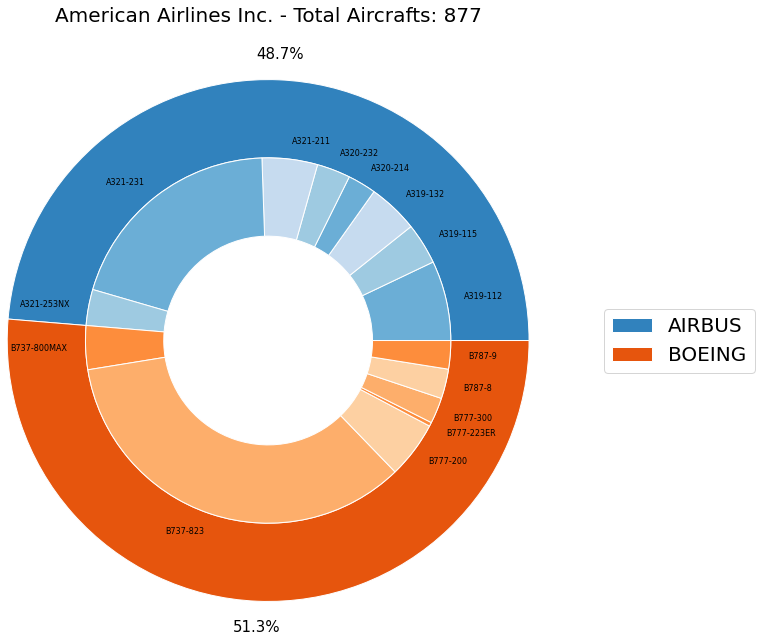

In [ ]:
import matplotlib.pyplot as plt
#import numpy as np

def fleet_pie (carr):
    carrier_pd = BTS_model_pd[BTS_model_pd.CARRIER == carr]
    name = carrier_pd['CARRIER_NAME'].iloc[0] + ' - Total Aircrafts: ' + str(carrier_pd['NO. AIRCRAFTS'].sum())
    size = 0.9

    fig, ax = plt.subplots()
    
    ##Color Picking
    airbus_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='AIRBUS')])
    boeing_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='BOEING')])
    bombardier_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='BOMBARDIER')])
    embraer_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='EMBRAER')])


    blues = [1, 2, 3]* 5
    oranges = [5, 6, 7]* 5
    purples = [13, 14, 15]* 5
    greens = [9, 10, 11]* 5

    airbus_col = blues[0: airbus_no]
    boeing_col = oranges[0:boeing_no]
    bombardier_col = purples[0:bombardier_no]
    embraer_col = greens[0: embraer_no]

    col_ls = [airbus_col, boeing_col, bombardier_col, embraer_col]

    outer_cols = []

    for ls in col_ls:
        if ls:
            outer_cols.append((ls[0]//4)*4)

    inner_cols = airbus_col + boeing_col + bombardier_col + embraer_col

    cmap = plt.cm.get_cmap('tab20c')
    outer_colors = cmap(outer_cols)
    inner_colors = cmap(inner_cols)
    
    #Making Labels
    
    manufacturer_labels = []

    for man in carrier_pd['MANUFACTURER']:
        if man not in manufacturer_labels:
            manufacturer_labels.append(man)
    
    model_labels = []

    for mod in carrier_pd['MODEL']:
        if mod not in model_labels:
            model_labels.append(mod)
    
    #Pie Chart Generating
    
    ax.pie(carrier_pd.groupby('MANUFACTURER')["NO. AIRCRAFTS"].sum(), radius=3, autopct='%1.1f%%', colors = outer_colors, 
           wedgeprops=dict(width=size, edgecolor='w'), textprops={'color':"k", 'fontsize':15}, pctdistance = 1.1)
    ax.legend(manufacturer_labels,
          loc="center left",
          bbox_to_anchor=(2, 0, 0.5, 1), prop={"size":20})

    ax.pie(carrier_pd['NO. AIRCRAFTS'], radius=3-size, colors = inner_colors, labels = model_labels,textprops={'color':"k", 'fontsize':8},
           wedgeprops=dict(width=size, edgecolor='w'))
    
    plt.title(name, pad=210, fontsize=20)

    ax.set(aspect="equal")
    return (plt.show)
fleet_pie('AA')

#### Fleet Characteristics Distribution Histograms

In addition to the analysis of the fleet models, fleet capacity and age are also useful variables to consider when reviewing how the fleet impacts the airline emmissions. As this is numerical data, the distributions of these variables can be visualised using histograms.

array([[<AxesSubplot:title={'center':'CAPACITY_IN_POUNDS'}>,
        <AxesSubplot:title={'center':'MANUFACTURE_YEAR'}>]], dtype=object)

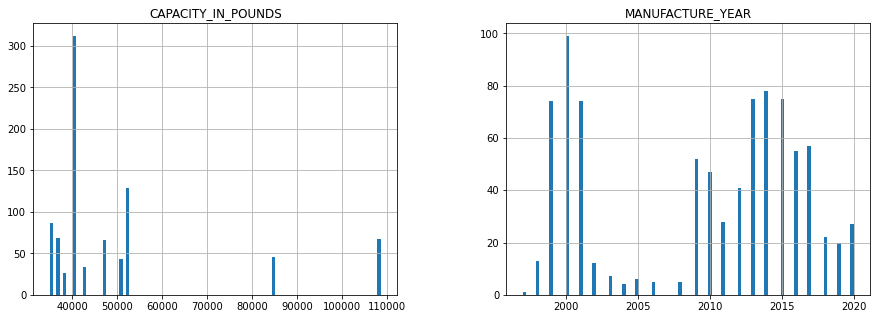

In [ ]:
carrier_pd = BTS_fleet_pd[BTS_fleet_pd.CARRIER == 'AA']
carrier_pd.hist(column = ['CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR'], bins = 100, figsize = [15,5])


#### Generating Fleet Statistics Dashboards

Using the Dashboard Generator below a snapshop of fleet model, age and capacity distribution can be seen for each airline. A handy reminder of the carrier code for each airline has also been added.

In [ ]:
BTS_fleetsize_pd.drop_duplicates(subset=['CARRIER'])[["CARRIER", "CARRIER_NAME"]]

,CARRIER,CARRIER_NAME
0,AA,American Airlines Inc.
92,AS,Alaska Airlines Inc.
134,B6,JetBlue Airways
166,DL,Delta Air Lines Inc.
280,F9,Frontier Airlines Inc.
300,HA,Hawaiian Airlines Inc.
316,NK,Spirit Air Lines
336,OO,SkyWest Airlines Inc.
371,UA,United Air Lines Inc.
475,WN,Southwest Airlines Co.


##### Dashboard Generator

In [ ]:
##Uncomment to run dashboard generator
# carr_code = input('which airline would you like to view the fleet model distribution chart for? (Please input a carrier code) ')
# def dashboard (carr):  
#     fleet_pie(carr)
#     carrier_pd = BTS_fleet_pd[BTS_fleet_pd.CARRIER == carr]
#     carrier_pd.hist(column = ['CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR'], bins = 100, figsize = [15,5])
# dashboard(carr_code)

### Fleet: Analysis

#### Understanding Emissions Ranking

The fleet distribution needs to be understood with respect to the emissions of each airline. By ranking the airlines based on their emissions in the most recent year within our scope (2019) we can see trends of the highest emitters versus the lowest emitters. 

To allow for this analysis, the previously generated Emissions csv needs to be transformed to sum up all of the emmissions in 2019 and ranked. Later in the analysis the dashboards for the highest and lowest emittors will be grouped and analysed.

One variable which has a high chance of being confounding is the fleet size. It is likely that airlines with more aircraft will produce higher emissions. Whilst this would be a valid conclusion, the effect may mask more nuanced deductions such as the impact of model and brand type on emmissions. For this reason the emissions data will be joined to the total fleet data to test this hypothesis.

In [ ]:
req_col = ['IATA Code', 'Airline Name', 'Year', 'CO2 Emissions (thousands of kg)' ]
emissions_pd = pd.read_csv('Fuel-DataEmissions-Table_v2.csv', usecols= req_col)

rec_emm = emissions_pd[emissions_pd.Year == 2019]
ranking_pd = rec_emm.groupby(['IATA Code','Airline Name','Year'],as_index = False)[["CO2 Emissions (thousands of kg)"]].sum()

noair_pd = BTS_fleetsize_pd.groupby(['CARRIER','CARRIER_NAME'],as_index = False)[["NO. AIRCRAFTS"]].sum()
noair_pd.sort_values("NO. AIRCRAFTS", ascending = True, inplace = True)

rank_fleet_pd = pd.merge(
    ranking_pd,
    noair_pd,
    how="left",
    on=None,
    left_on= 'IATA Code',
    right_on= 'CARRIER',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=False,
    indicator=False,
    validate=None,
)
rank_fleet_pd.drop(labels = ['Year', 'CARRIER', 'CARRIER_NAME'], axis=1, inplace =True)
rank_fleet_pd['Emissions per Aircraft (Thousands of kg)'] = rank_fleet_pd.apply(lambda row: row['CO2 Emissions (thousands of kg)'] / row['NO. AIRCRAFTS'],axis=1)
rank_fleet_pd = rank_fleet_pd.sort_values("CO2 Emissions (thousands of kg)", ignore_index = True)
rank_fleet_pd

,IATA Code,Airline Name,CO2 Emissions (thousands of kg),NO. AIRCRAFTS,Emissions per Aircraft (Thousands of kg)
0,OO,SkyWest Airlines,9.944033e+05,561,1772.554861
1,HA,Hawaiian Airlines,2.572453e+06,59,43600.893712
2,F9,Frontier Airlines,2.753693e+06,104,26477.819611
3,NK,Spirit Air Lines,4.494868e+06,155,28999.146716
4,AS,Alaska Airlines,6.967189e+06,197,35366.442236
5,B6,JetBlue Airways,8.451378e+06,267,31653.100972
6,WN,Southwest Airlines,1.981933e+07,718,27603.518184
7,UA,United Air Lines,3.386846e+07,782,43310.048362
8,DL,Delta Air Lines,3.450202e+07,750,46002.695639
9,AA,American Airlines,3.493181e+07,877,39831.026868


The scatter plot generated below tests the hypothesis that airlines with larger fleets produce more CO2 emissions. The chart shows a strong positive correlation suggesting that the hypothesis is correct. However, the graph also shows two outliers: Skywest Airlines and Southwest Airlines. These anomalies suggest that whilst the number of aircrafts is very indicative of the total emissions, there are further variables contributing to lower emissions.

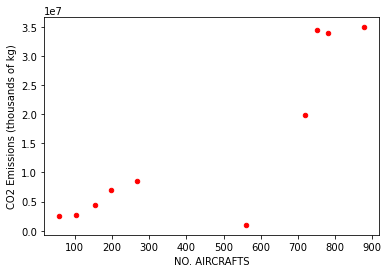

In [ ]:
 emmissions_fleetsize= rank_fleet_pd.plot.scatter(x='NO. AIRCRAFTS',
                      y='CO2 Emissions (thousands of kg)',
                      c='r')

To account for the impact of the number of aircrafts on emmissions, a second ranking based on the average emissions per aircraft has also been carried out.

In [ ]:
rank_perfleet_pd = rank_fleet_pd.sort_values("CO2 Emissions (thousands of kg)", ignore_index = True)
rank_perfleet_pd

,IATA Code,Airline Name,CO2 Emissions (thousands of kg),NO. AIRCRAFTS,Emissions per Aircraft (Thousands of kg)
0,OO,SkyWest Airlines,9.944033e+05,561,1772.554861
1,HA,Hawaiian Airlines,2.572453e+06,59,43600.893712
2,F9,Frontier Airlines,2.753693e+06,104,26477.819611
3,NK,Spirit Air Lines,4.494868e+06,155,28999.146716
4,AS,Alaska Airlines,6.967189e+06,197,35366.442236
5,B6,JetBlue Airways,8.451378e+06,267,31653.100972
6,WN,Southwest Airlines,1.981933e+07,718,27603.518184
7,UA,United Air Lines,3.386846e+07,782,43310.048362
8,DL,Delta Air Lines,3.450202e+07,750,46002.695639
9,AA,American Airlines,3.493181e+07,877,39831.026868


#### Comparing the Lowest Emitters with the Highest

As previously discussed, the initial analysis has shown that a key factor in the total emissions is the number of aircrafts operating for the airline. Most of the airlines with the lowest emmissions had fewer than 200 operating aircraft, whereas many of the high emitters had over 700. This is unsurprising as it is to be expected that bigger airlines would have larger fleets, carry out more journeys and thus produce more CO2 emmissions. An exception to this trend however is SkyWest Airlines, which had the lowest emissions but a relatively high fleet (561 total aircraft).

Another trend in fleet model distribution was that the high emitters tended to have a larger percentage of Boeing Aircraft. There is a high change that this trend is mainly correlational rather than causal. Airbus is a historically european manufacturer and so it is likely that larger american airlines prefer the American company Boeing. That said with Boeing often adopting Rolls-Royce Engines whilst Airbus often preferentially selects General Electric engines, there is a chance that the emissions related to these respective engine types could be playing a role. 

When revieing the manufacture year histogram there was a slight trend in the amount of aircraft purchased in the early 2000 verses closer to 2020. Many of the low emitters had a noticable peak (or secondary peak) around 2018, and the data tended to be left skewed. Many of the higher emitting airlines showed more purchases in the early 2000s. This suggests that if more older aircraft are operating the emissions are increased. This could be because newer fleets are taking advantage of the efficiency savings and reduced emissions from newer engine models.

It should be noted that within this section the coded sections have been commented out to make the navigation of this Jupyter Notebook easier. Uncomment to view the graphs.

In [ ]:
# #Uncomment to view low emitters
# ranked_emitters = []
# for airline in rank_fleet_pd['IATA Code']:
#         ranked_emitters.append(airline)
# low_emitters = ranked_emitters[0:5]
    
# for code in low_emitters:
#     dashboard(code)
    

In [ ]:
# # Uncomment to view high emitters
# high_emitters = ranked_emitters[5:11]
    
# for code in high_emitters:
#     dashboard(code)

#### Analysing Airlines with Low Emissions per Aircraft

One aim of researching the fleet distribution is to identify the tenants of a sustainable airline and to see which informed decisions can lead to an airline being more environementally friendly despite its size. For this reason the top 5 airlines with the lowest emissions per aircraft have also been analysed.

One notable feature of the low emitters per aircraft set is that the fleet distribution is relatively simplistic. Few models can be seen in their fleet portfolio or in the case of southwest, a single manufacturer is used. This could suggest that lower emitters find a well performing and efficient engine and stick with it. Some of the favourite models within this set are the A320 and the B737.

One outlier in this analysis has been SkyWest Airlines which has a fleet portfolio which contrasts with the other airlines significantly. It features solely Bombardier and Embraer manufactured aircrafts, has the lowest emissions of all the airlines and still has a relatively large fleet. Upon review, SkyWest is a regional airline that mainly carries out flights within North america. It is likely that these shorter flights rather than the nature of the fleet itself has the larger impact on its emissions.

It should be noted that within this section the coded sections have been commented out to make the navigation of this Jupyter Notebook easier. Uncomment to view the graphs.

In [ ]:
## Uncomment to view ranked per aircraft low emitters
# ranked_per_emitters = []
# for airline in rank_perfleet_pd['IATA Code']:
#         ranked_per_emitters.append(airline)
# low_per_emitters = ranked_per_emitters[0:5]
    
# for code in low_per_emitters:
#     dashboard(code)

### Fleet: Conclusions

The conclusions for this section of analysis have been summarised below:
#### Fleet: Methodology
* Pie Charts are a useful visualisation method to gain insight into categorical data. By nesting the data a higher density of information can be interpreted simply.
* When more categories exist in the data of the data is time dependant (such as analysis of many years) histograms are useful as they allow you to analyse skews in the data.
* Data Cleansing not only ensures the quality and validity of the output, it also simplifies the coding experience and prevents human error throughout the process.

#### Fleet and Emissions
* The larger the fleet the greater the emissions that will be produced
* Older fleets tend to lead to higher emissions
* Simple fleets with fewer models appear to produce lower emissions
* Boeing manufactured aircraft may lead to higher emissions, but this required further investigation on individual aircraft to substantiate.

## Revenue:

This section focuses on analysis of finanacial data related to revenue for US Airlines. Analysis was conducted to find the relationship between emissions and revenue for the airlines.

### Revenue: Cleaning the Dataset

Revenue for Frontier Airline and Spirit Airlines has not been included because this data was not available.

First the csv file containing revenue and emissions for each airlines was imported using pandas

In [ ]:
import pandas as pd
rev_df = pd.read_csv("Revenue_emissions1.csv")
rev_df

# Data Visualisation and Analysis

Data Analysis was conducted to find correalations of revenue and emissions for years in the time frame from 2010 -2019 for the selected US Airlines

Then a scatter plot was used to visualise  a general relation of revenue to year for US Airlines. This plot shows a general increase in revenue for each year from 2010 to 2019.

In [ ]:
rev_df.plot.scatter(x='Year', y='Revenue (billion of dollars $)', title='Relation of revenue to year for Alaska Airlines')


In the next section two plots are being plotted to illustrate relationship between the emsssions and revenue data for the airlines for the given time period(excluding frontier airlines because of unavailabilty of data). The Quarterly Data will be summed up to provide data yearly.

In [ ]:
# Generating a graph of yearly revenue by each airline over the 10 year period

# Group the table data by the year column, since we are looking for a yearly breakdown, then by the airlines, for this

rev_year_grouped = rev_df.groupby(['Year','Airline Name'])['Revenue (billion of dollars $)'].sum()

# Convert the data into a dataframe and reset the index columns, which assigns the emissions sum as a proper column.
rev_year_grouped = rev_year_grouped.to_frame().reset_index()

# Check that the correct data has been aggregated

print(rev_year_grouped)

# We can do the same for emisssions

emissions_year_grouped = rev_df.groupby(['Year','Airline Name'])['CO2 Emissions (thousands of kg)'].sum()
emissions_year_grouped = emissions_year_grouped.to_frame().reset_index()

print(emissions_year_grouped)

Now since we have the data in the order we need them. Two plots can be constructed for emissions data and revenue data for each year for the selected airlines.

In [ ]:
import matplotlib.pyplot as plt

# Plotting the transformed data for revenue data
# Frontier airlines has not been considered because of missing data
plt.figure(1)
x = rev_year_grouped['Year'].unique().tolist()
y = rev_year_grouped['Revenue (billion of dollars $)'].tolist()
labels = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 
          'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
          'United Air Lines Inc.']

plt.figure(figsize=(13,10))

plt.plot(x, y[0:79:8], label = labels[0])
plt.plot(x, y[1:79:8], label = labels[1])
plt.plot(x, y[2:79:8], label = labels[2])
plt.plot(x, y[3:79:8], label = labels[3])
plt.plot(x, y[4:79:8], label = labels[4])
plt.plot(x, y[5:79:8], label = labels[5])
plt.plot(x, y[6:79:8], label = labels[6])
plt.plot(x, y[7:80:8], label = labels[7])



plt.legend(loc='center right', bbox_to_anchor=(1.3,0.8))
plt.xticks(x)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('Revenue For Each Airline (2010 - 2019)', size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('Revenue (billion of dollars $)', size = 12)

# Plotting the transformed data for emmisions data
# Here Frontier airlines has not been considered 
plt.figure(2)
x = emissions_year_grouped['Year'].unique().tolist()
y = emissions_year_grouped['CO2 Emissions (thousands of kg)'].tolist()
labels = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 
          'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
          'United Air Lines Inc.']

plt.figure(figsize=(13,10))

plt.plot(x, y[0:79:8], label = labels[0])
plt.plot(x, y[1:79:8], label = labels[1])
plt.plot(x, y[2:79:8], label = labels[2])
plt.plot(x, y[3:79:8], label = labels[3])
plt.plot(x, y[4:79:8], label = labels[4])
plt.plot(x, y[5:79:8], label = labels[5])
plt.plot(x, y[6:79:8], label = labels[6])
plt.plot(x, y[7:80:8], label = labels[7])



plt.legend(loc='center right', bbox_to_anchor=(1.3,0.8))
plt.xticks(x)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('Emissions For Each Airline (2010 - 2019)', size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('CO2 Emissions (thousands of kg)', size = 12)

#### Interpretation

The yearly emissions from fuel combustion show that there is an increase in total emissions of Carbon dioxide emissions from 2010- 2019 for all airlines. A significant increase in emissions is seen for American Airlines Inc between a 2014 and 2016 and also United Airlines between 2011 and 2012.

It can be concluded from this representation that higher the revenue, the higher the CO2 emissions as both the revenue and emissions data show a general increase from 2010 to 2019.

### Individual Airline

We can also aggregate the data to have only data for a single airline and look at trends in revenue in the time frame between 2010 and 2019. The following analysis has been done to show the trend in revenue for Alaska airlines from 2010 to 2019.

In [ ]:
revenues_alaska = rev_df[rev_df['Airline Name'] == 'Alaska Airlines']
revenues_alaska


In [ ]:
revenues_alaska.plot.scatter(x='Year', y='Revenue (billion of dollars $)', title='Relation of revenue to year for Alaska Airlines')


#### Interpretation

There is a general increase in revenue for Alaska Airlines from 2010 - 2019

### Correlation Matrix

In [ ]:
rev_df_new = rev_df.drop(columns=['Airline Name', 'Year', 'Quarter'])
import seaborn as sns
sns.heatmap(rev_df_new.corr(), annot=True, cmap="coolwarm")

NameError: name 'rev_df' is not defined

## Ticket Price:

## Analysing US airlines 2010-2019 ticket price data 

In this section, we analyse the ticket price data  of domestic flights in the USA between 2010 and 2019.  
Our aim is to investigate whether airline ticket prices have a correlation, or any relationship to their CO2 emissions.  
We used the open data from the U.S. Department of Tranportation's website:  
https://data.transportation.gov/Aviation/Consumer-Airfare-Report-Table-6-Contiguous-State-C/yj5y-b2ir

### Columns in this Dataset
    
|___Column Name___ |___Description___ |___Type___ |
|:------------|:--------------|:-------------|
|tbl |Name of the data table |Plain Text|
|Year | Year | Number|
|quarter | Quarter | Number|
| citymarketid_1 | Identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market | Number|
|citymarketid_2	|Identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market|Number|
|city1|City1 is used to consolidate airports serving the same city market|Plain Text
|city2	|City2 is used to consolidate airports serving the same city market|Plain Text
|nsmiles|Non-Stop market miles (using radian measure)|Number
|passengers	|Passenger per day|Number
|fare | Overall average fare |Number
|carrier_lg	|Carrier with the largest market share |Plain Text
|large_ms|Market share for the carrier with the largest market share|Number
|fare_lg|Average fare for the carrier with the largest market share|Number
|carrier_low|Carrier with the lowest fare|Plain Text
|lf_ms	|Market share for the carrier with the lowest fare|Number
|fare_low|Average fare for the carrier with the lowest fare|Number
|table_1_flag|Flag for Table 1 subset. Top 1,000 Contiguous State City Pair Markets.|Number
|location_1| Geocoded City1 is used to consolidate airports serving the same city market with Latitude and Longitude| Point|
|location_1_city|Geocoded_City1 (city)|Plain Text
|location_2|Geocoded - City2 is used to consolidate airports serving the same city market with Latitude and Longitude|Point
location_2_city|Geocoded_City2 (city)|Plain Text
|tbl6pk	|Primary Key for Table 6, unique id|Number

### Airline codes
|___IATA Code___|___Airline Name___|
|:-------------|:-----------------|
|AA|American Airlines|
|AS|Alaska Airlines|
|B6|JetBlue Airways|
|CO|North-Western Cargo International Airlines|
|DL|Delta Air Lines|
|F9|Frontier Airlines|
|FL|Air Large European Aviation Project Air Leap|
|G4|Allegiant Air| 
|NK|Spirit Airlines|
|UA|United Airlines|
|WN|Southwest Airlines|

#### Loading data from API

In [ ]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# The sodapy libary needs to be installed for the API request

# pip install sodapy

In [ ]:
# Making an API request, using sodapy package to access the 2010-2019 data

from sodapy import Socrata

client = Socrata("data.transportation.gov", None)

results = client.get("yj5y-b2ir", where='year > 2009 and year < 2020', limit = 600000)

#### Cleaning and transforming data

In [ ]:
fare_full_df = pd.DataFrame.from_records(results)

In [ ]:
fare_full_df.shape

In [ ]:
fare_full_df.head()

In [ ]:
fare_full_df.info()

In [ ]:
# We do not need all the columns from this table
# Filter table for relevant information only
fare_df = fare_full_df[['year','quarter','city1','city2','nsmiles','passengers','fare',
                   'carrier_lg','large_ms','fare_lg','carrier_low','lf_ms','fare_low','tbl6pk']]
fare_df.head()

In [ ]:
# Convert data types of columns of interest
fare_full_df = fare_full_df.astype({'year':'int64', 'quarter':'int64', 'nsmiles':'float64', 'passengers':'float64',
                                    'fare':'float64', 'large_ms':'float64', 'fare_lg':'float64', 'lf_ms':'float64',
                                    'fare_low':'float64', 'tbl6pk':'int64'})
fare_full_df.info()

In [ ]:
# Print basic info to investigate incomplete data
fare_df.info()

In [ ]:
# Six columns have three missing data points, we check if they are all in the same three rows.
nan_rows = fare_df[fare_df['carrier_lg'].isnull()]
nan_rows

In [ ]:
# All three rows with missing data have the same departure and arrival cities
# We list all the flights with these parameters
missing_data_points = fare_df[(fare_df['city1']=='New York City, NY (Metropolitan Area)') & (fare_df['city2']=='Provincetown, MA')]
missing_data_points

In [ ]:
# The carriers on the other flights are all B6, so we can conclude that this airline serves this route.
# We replace NaN values in columns 'carrier_lg' and 'carrier_low' with B6 in the original dataframe

fare_full_df.carrier_lg = fare_full_df.carrier_lg.fillna('B6')
fare_full_df.carrier_low = fare_full_df.carrier_low.fillna('B6')

In [ ]:
# For the numerical value columns: 'large_ms', 'fare_lg', 'lf_ms', 'fare_low'
# we cannot use the data of the other flights on the same route, as we only have 3 known data points.
# We use the column mean value to replace the missing data points in the original dataframe.

fare_full_df.large_ms = fare_full_df.large_ms.fillna(fare_full_df.large_ms.mean())
fare_full_df.fare_lg = fare_full_df.fare_lg.fillna(fare_full_df.fare_lg.mean())
fare_full_df.lf_ms = fare_full_df.lf_ms.fillna(fare_full_df.lf_ms.mean())
fare_full_df.fare_low = fare_full_df.fare_low.fillna(fare_full_df.fare_low.mean())

In [ ]:
# Checking if there are any more NaN values left.
# All values are non-null in every columns.

fare_df = fare_full_df[['year','quarter','city1','city2','nsmiles','passengers','fare',
                   'carrier_lg','large_ms','fare_lg','carrier_low','lf_ms','fare_low','tbl6pk']]
fare_df.info()

In [ ]:
# Save cleaned data
fare_full_df.to_csv('us_domestic_fare_full.csv') 

#### Analysis

In [ ]:
# Top 10 airlines by market share (Airline code, Frequency)
fare_10ms = (fare_df.carrier_lg.value_counts()).head(10)
fare_10ms


In [ ]:
# Restrict data to top 10 airlines only
carrier_10ms = ['DL', 'AA', 'UA', 'WN', 'G4', 'AS', 'F9', 'CO', 'B6', 'US']
fare10_df = fare_df[fare_df['carrier_lg'].isin(carrier_10ms)]

In [ ]:
# Calculate quarterly average ticket price per mile
fare10_df['price_per_mile'] = fare10_df['fare'] / fare10_df['nsmiles']
fare10_df.head()

In [ ]:
# Group mean price per mile by airline, year and quarter
fare_agg_df = fare10_df.groupby(['carrier_lg', 'year', 'quarter']).agg({'price_per_mile': ['mean']}).reset_index()
fare_agg_df.columns = ['carrier_lg', 'year', 'quarter', 'mean_ppm']

fare_agg_df.describe()

In [ ]:
# Plot mean price per airline to compare price data of different airlines, using a line plot

# Group mean price per mile by airline, year and quarter for top 10 airlines
fare_agg_df = fare10_df.groupby(['carrier_lg', 'year', 'quarter']).agg({'price_per_mile': ['mean']}).reset_index()
fare_agg_df.columns = ['carrier_lg', 'year', 'quarter', 'mean_ppm']

# Define index column
fare_agg_df.set_index(['year','quarter'], inplace=True)

# Group data by carrier and mean price per mile as line chart
plt.figure(figsize=(15,12))
fare_agg_df.groupby('carrier_lg')['mean_ppm'].plot(legend=True)

plt.xlabel('Quarters')
plt.ylabel('Average Ticket Price Per Mile')
plt.title('Quarterly Average Ticket Price Per Mile 2010-2019', fontsize = 15)
plt.legend(loc='center right', bbox_to_anchor=(1.35,0.5))
plt.show()

The graph shows a wide variation in average ticket price for the different airlines, with a range between 0.13 USD and 0.41 USD per mile. Furthermore the behaviour of the different prices vary from each other. Most of them shows a slightly increasing trend between 2010 and 2019, but there are also ones whose average prices per mile have decreased, such as Frontier Airlines (F9, brown), or stayed largely the same: Allegiant Air (G4, pink).  
We can also see a seasonal variation, where prices go up and down during the year. This is most obvious in the case of JetBlue Airways (B6, green) where the prices occasionally halve from one point to the next.  
  
Note: US Airways (US, yellow) and North-Western Cargo International Airlines (CO, red) stopped operating during our time frame, hence the abrupt end at those lines

#### Accessing emission data

In [ ]:
# Read revenue vs emission file
revemi_data = pd.read_csv('Project_CFG_Rev_Emi_Raw.csv')

# Checking data in file
revemi_data.info()

In [ ]:
# Replace airline names with airline codes
revemi_data['Airline Name'] = revemi_data['Airline Name'].map({
    'Alaska Airlines': 'AS',
    'American Airlines': 'AA',
    'Delta Air Lines': 'DL',
    'Hawaiian Airlines': 'HA',
    'JetBlue Airways': 'B6',
    'SkyWest Airline': 'OO',
    'Southwest Airlines': 'WN',
    'Spirit Airlines': 'NK',
    'United Airlines': 'UA'  
    })

# Rename columns in file
revemi_data.columns = ['carrier_code', 'year', 'quarter', 'co2_emission_thousand_kg', 'revenue_billion_dollar']

revemi_data.head()

#### Joining two dataframes

In [ ]:
# Add column with price per mile values in main dataframe
fare_df['price_per_mile'] = fare_df['fare'] / fare_df['nsmiles']

# Group mean price per mile by airline, year and quarter
fare_mean_df = fare_df.groupby(['carrier_lg', 'year', 'quarter']).agg({'nsmiles': ['sum'], 'price_per_mile': ['mean']}).reset_index()
# Rename columns
fare_mean_df.columns = ['carrier_code', 'year', 'quarter', 'nsmiles', 'mean_price_pm']

# Merge dataframes: fare_mean_df and revemi_data
faremi_df = pd.merge(fare_mean_df, revemi_data,  how='inner', 
                     left_on=['carrier_code','year','quarter'], right_on = ['carrier_code','year','quarter'])

# Standardising CO2 emission and revenue values to be able to compare them to ticket price per mile
# Calculate CO2 emission per mile and revenue per mile
faremi_df['co2_thousand_kg_pm'] = faremi_df['co2_emission_thousand_kg'] / faremi_df['nsmiles']
faremi_df['revenue_thousand_usd_pm'] = (faremi_df['revenue_billion_dollar'] / faremi_df['nsmiles'])*1000000

In [ ]:
faremi_df.head()

In [ ]:
faremi_df.describe()

In [ ]:
print((faremi_df.carrier_code.value_counts()))

#### Analysis

In [ ]:
# Calculate attributes correlations
faremi_df.corr()

The correlation table shows strong correlations between some of the values, such as total revenue and CO2 emissions (0.97) and non-stop miles and emissions (0.90) and non-stop miles and revenue (0.87). This correlations can be explained by the nature af our data. More airline miles results in higher CO2 emissions and higher revenue for the business.  
There are also some weaker correlations, for example between revenue per mile and CO2 emission per mile (0.71) which means that increasing CO2 emission has a slight increasing effect on revenue per mile. The table shows  weak negative correlation between mean ticket price and mile and CO2 emission per mile; -0.65, where a higher CO2 emission would weakly correlate to lower ticket price.  
The smallest value in the table is between CO2 emission per mile and yearly quarters (-0.009), shows no correlations between these data.

In [ ]:
# Correlation heatmap
plt.figure(figsize = (8,8))
corrmat = faremi_df[['year', 'quarter', 'co2_thousand_kg_pm', 'revenue_thousand_usd_pm', 'mean_price_pm']].corr()
print(corrmat)
sns.heatmap(corrmat, annot = True)

The heatmap shows positiv correlation of 0.71 between revenue and CO2 emission, as revenue per mile increases CO2 emission per mile also increases.  
Average ticket price per mile shows weak negative correlation of -0.65 to CO2 emission per mile, implying that higher ticket prices may result in lower emissions.  
There is practically no correlation (-0.009) between CO2 emission rate and the quarters of the year, suggesting that the CO2 gas emitted by aircrafts, per mile, has no seasonal variations during the year.

### Investigating the relationship between CO2 emissions and ticket price data for individual airlines

In [ ]:
# Scatter plot to show relationship between CO2 emission per mile and ticket prices per mile, in the USA between 2010 and 2019
fig=faremi_df[faremi_df.carrier_code=='AA'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='orange', label='AA')
faremi_df[faremi_df.carrier_code=='AS'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='blue', label='AS',ax=fig)
faremi_df[faremi_df.carrier_code=='B6'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='green', label='B6',ax=fig)
faremi_df[faremi_df.carrier_code=='DL'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='red', label='DL',ax=fig)
faremi_df[faremi_df.carrier_code=='NK'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='purple', label='NK',ax=fig)
faremi_df[faremi_df.carrier_code=='UA'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='brown', label='UA',ax=fig)
faremi_df[faremi_df.carrier_code=='WN'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='pink', label='WN',ax=fig)

fig.set_xlabel("CO2 Emission per mile")
fig.set_ylabel("Ticket Price per mile")
fig.set_title("CO2 Emission vs Ticket Price")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### CO2 Emission vs Ticket Price
The scatter plot enables us to investigate CO2 Emission vs Ticket Price data of each airlines separately.  
The values of CO2 Emission ranges between 1.02 and 28.72 thousand kg per mile and the values of ticket price ranges between 0.13 and 0.41 USD per mile.  
Similarly to the results of correlation matrix and the heatmap, the scatter plot does not show a strong correlation between ticket prices and the airlines' carbon-dioxide emission data in most of the cases.  
A slight correlation can be seen in the case of Alaska Airlines (AS, blue); ticket price increase shows some  with increasing CO2 emission, but the data points are within a small range, so any changes in one parameter would only result in a small increase in the other.  
Five of the seven investigated airlines have largely similar data, with CO2 emission at the lower end of the range (between 1.0 and 6.0) that coincides with higher ticket prices (between 0.24 and 0.41).  
CO2 emission seems to stay within a smaller range for most of the airlines, whereas ticket prices are seem to be more volatile. This seems reasonable, as airlines tend to use the same type of aircrafts all year around, but ticket prices depend on many factors, such as time of the year.  
Two airlines show behaviour that is different from the others.
JetBlue Airways (B6, green) has more spread out datapoints, with higher emissions (7.0-15.0) and slightly lower prices (0.18-0.37) than the majority of the airlines. Their data points are also more spread out than other airlines'.  
Spirit Airlines (NK, purple) has more spread out and higher emission rates (5.0-28.0) that pairs with markedly lower prices (0.13-0.18).  
These differences between JetBlue Airways and Spirit Airlines and the rest of the airlines might be the result of them keeping their prices low by not upgrading their outdated fleets.  
This plot shows that CO2 emissions and ticket prices do have some negativ correlation, as airlines with higher prices have lower emissions and airlines with lower prices have higher emissions. This is more of a difference between different companies and these parameters do not vary much for individual airlines in most cases.